# EDA and Maps showing the different pollutants

In [3]:
# packages

# standard
import numpy as np
import pandas as pd

# plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# maps
import folium

In [4]:
# load and remove redundancies
df = pd.read_csv('../../data/bronze/Air_pollution.csv', sep=';')
df = df.drop('Country', axis=1) # Country is always Belgium
df = df.drop('Country Code', axis=1) # Country Code is always BE
df = df.drop('Source Name', axis=1) # Source name is always EEA Belgium
df = df.drop('Unit', axis=1) # Unit is always \mu g/m^3
df.head()

,City,Location,Coordinates,Pollutant,Value,Last Updated
0,Flanders,Belgium - Flanders - 40AB02 - BERENDRECHT,"51.34073,4.3218203",PM10,39.2,2017-03-13T13:00:00+01:00
1,Brussels,Belgium - Brussels - 41R012 - UCCLE,"50.79663,4.3585386",SO2,2.0,2017-07-21T00:00:00+02:00
2,Flanders,Belgium - Flanders - 42N046 - GELLIK,"50.882298,5.618874",NO2,5.0,2017-07-21T00:00:00+02:00
3,Flanders,Belgium - Flanders - 42R897 - ANTWERPEN,"51.250107,4.3421044",SO2,0.0,2017-07-21T00:00:00+02:00
4,Wallonia,Belgium - Wallonia - 43H201 - LIEGE,"50.624992,5.5474644",SO2,0.5,2016-12-21T14:00:00+01:00


In [5]:
# aux functions for extracting the coordinates
def split_lat(coordinates):
    lat = coordinates.split(',')[0]
    return float(lat)

def split_lon(coordinates):
    lon = coordinates.split(',')[1]
    return float(lon)

In [6]:
# extract lat/lon
df['Longitude'] = list(map(split_lon, df.Coordinates))
df['Latitude'] = list(map(split_lat, df.Coordinates))
df = df.drop('Coordinates', axis=1)

In [7]:
# date handling
df['Date'] = pd.to_datetime(df['Last Updated'], format='%Y-%m-%d')
df['Year'] = list(map(lambda x: int(x.year), df.Date))

In [8]:
# summary
df.describe(include='all')

,City,Location,Pollutant,Value,Last Updated,Longitude,Latitude,Date,Year
count,615,615,615,615.000000,615,615.000000,615.000000,615,615.000000
unique,14,198,6,NaN,30,NaN,NaN,30,NaN
top,Flanders,Belgium - Brussels - 41R001 - MOLENBEEK,NO2,NaN,2017-07-21T00:00:00+02:00,NaN,NaN,2017-07-21 00:00:00+02:00,NaN
freq,175,6,167,NaN,281,NaN,NaN,281,NaN
mean,NaN,NaN,NaN,13.297405,NaN,4.497798,50.843490,NaN,2018.453659
std,NaN,NaN,NaN,15.562551,NaN,0.730406,0.372692,NaN,1.496156
min,NaN,NaN,NaN,0.000000,NaN,2.582323,49.719280,NaN,2016.000000
25%,NaN,NaN,NaN,3.203750,NaN,4.278890,50.616720,NaN,2017.000000
50%,NaN,NaN,NaN,7.500000,NaN,4.421559,50.895100,NaN,2017.000000
75%,NaN,NaN,NaN,15.000000,NaN,5.013205,51.170300,NaN,2020.000000


In [9]:
pollutants = list(df.Pollutant.value_counts().index)
print(pollutants)

['NO2', 'PM2.5', 'PM10', 'SO2', 'O3', 'CO']


In [10]:
# count frequencies
df.Pollutant.value_counts()

NO2      167
PM2.5    125
PM10     124
SO2       82
O3        79
CO        38
Name: Pollutant, dtype: int64

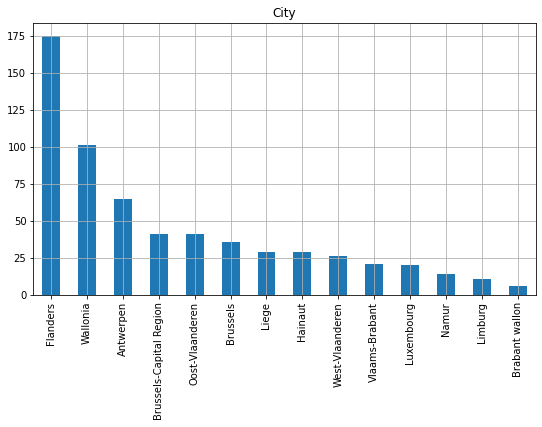

In [11]:
# cities
plt.figure(figsize=(9,5))
df.City.value_counts().plot(kind='bar')
plt.title('City')
plt.grid()
plt.show()

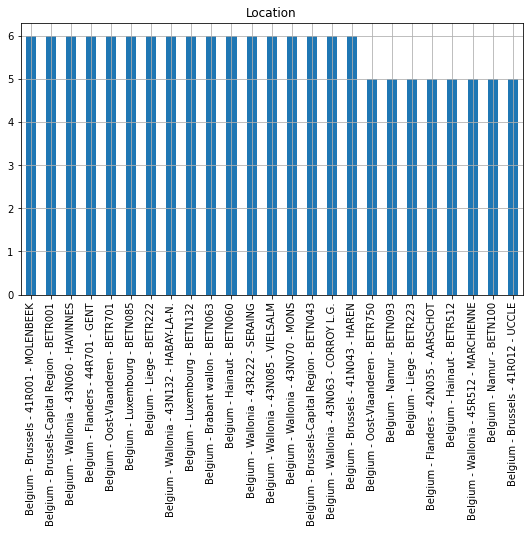

In [ ]:
# locations - top 25
plt.figure(figsize=(9,5))
df.Location.value_counts()[0:25].plot(kind='bar')
plt.title('Location')
plt.grid()
plt.show()

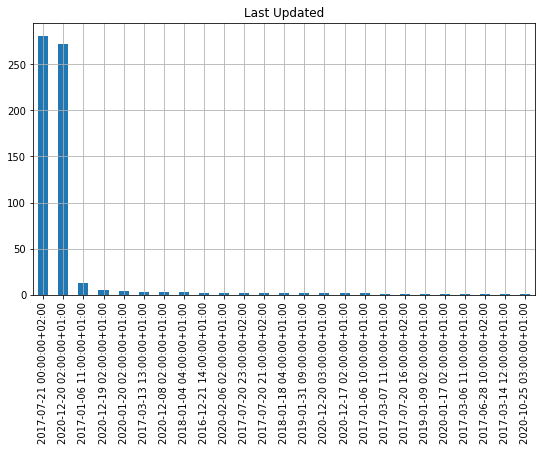

In [13]:
# last update
plt.figure(figsize=(9,5))
df.Date.value_counts()[0:25].plot(kind='bar')
plt.title('Last Updated')
plt.grid()
plt.show()

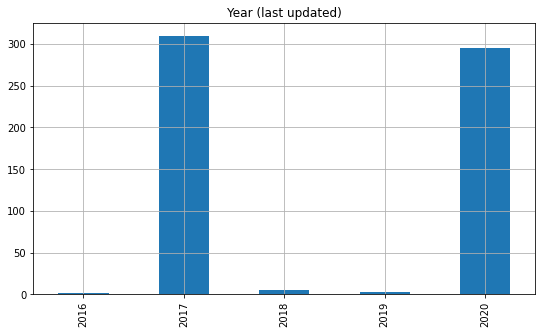

In [14]:
# year
plt.figure(figsize=(9,5))
df.Year.value_counts().sort_index().plot(kind='bar')
plt.title('Year (last updated)')
plt.grid()
plt.show()

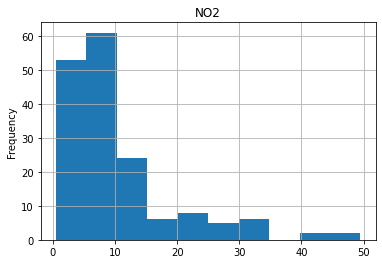

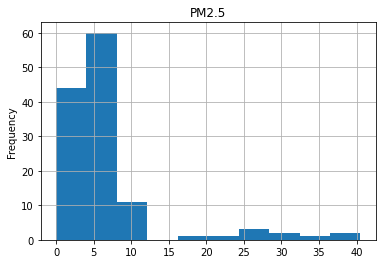

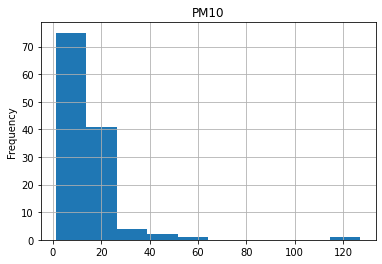

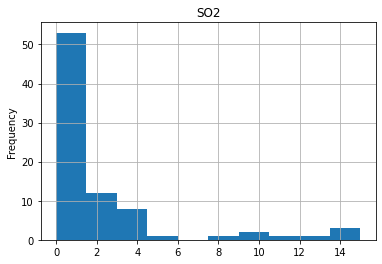

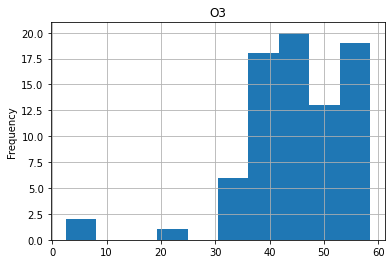

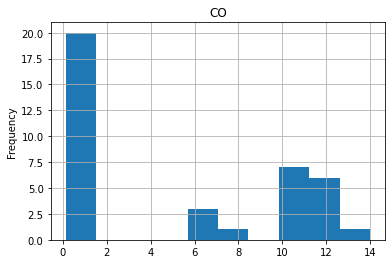

In [15]:
# plot distributions of pollutants
for p in pollutants:
    df_temp = df[df.Pollutant==p]
    plt.figure()
    v = df_temp.Value.plot(kind='hist')
    plt.title(p)
    plt.grid()
    plt.show()

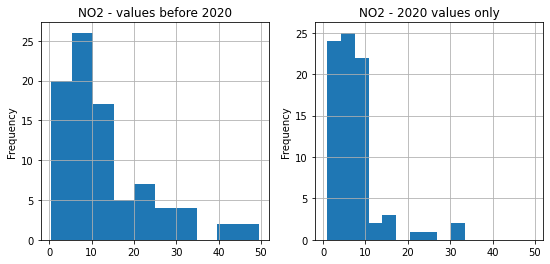

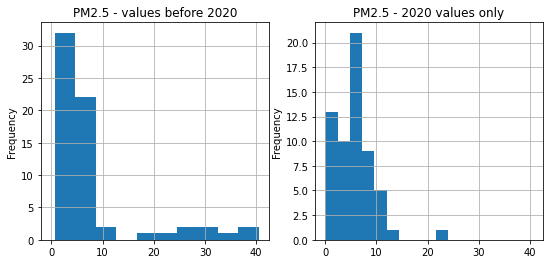

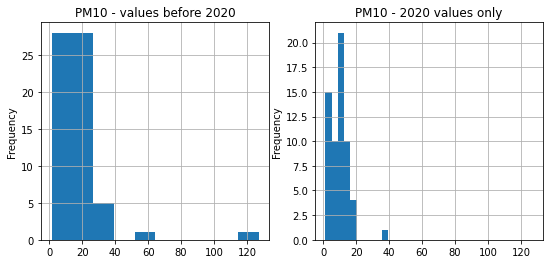

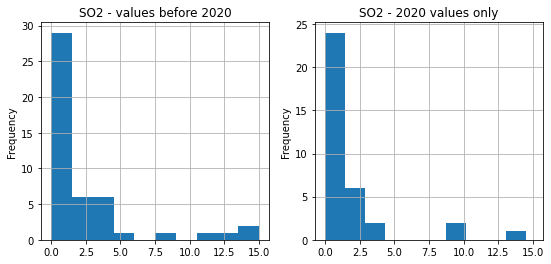

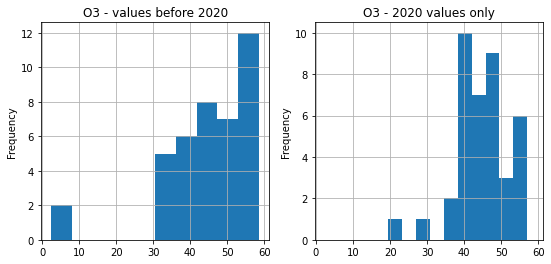

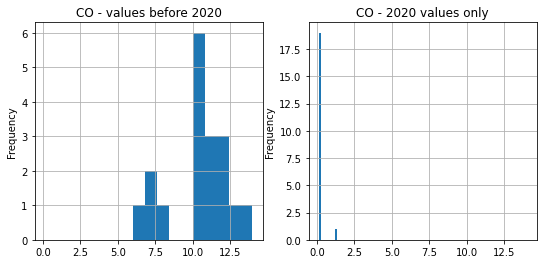

In [16]:
# plot distributions of pollutants - compare 2020 with previous years
for p in pollutants:
    df_temp_1 = df[(df.Pollutant==p) & (df.Year<2020)]
    df_temp_2 = df[(df.Pollutant==p) & (df.Year==2020)]
    plt.figure(figsize=(9,4))
    ax1 = plt.subplot(1,2,1)
    v = df_temp_1.Value.plot(kind='hist')
    plt.title(p + ' - values before 2020')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    v = df_temp_2.Value.plot(kind='hist')
    plt.title(p + ' - 2020 values only')
    plt.grid()
    plt.show()

#### We see a massive difference in the distribution of CO!

# Maps

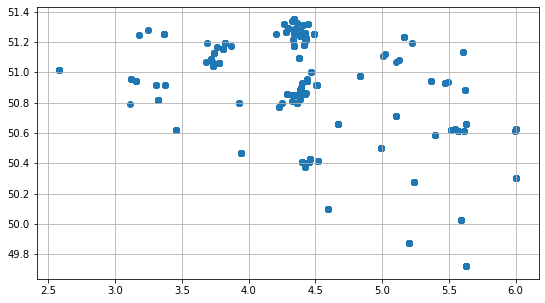

In [17]:
# check coordinates first
plt.figure(figsize=(9,5))
plt.scatter(df.Longitude, df.Latitude)
plt.grid()
plt.show()

Looks good!

# > Pollutant CO
(Carbon Monoxide)

In [36]:
# select specific pollutant; we only use the 2020 values
df_select = df[(df.Pollutant=='CO') & (df.Year==2020) & (df.Value>0)]

In [37]:
# check uniqueness of Location
df_select.Location.describe()

count                              20
unique                             20
top       Belgium - Hainaut - BETR512
freq                                1
Name: Location, dtype: object

In [38]:
# full table
df_select

,City,Location,Pollutant,Value,Last Updated,Longitude,Latitude,Date,Year
18,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETR001,CO,0.170,2020-12-20T02:00:00+01:00,4.333820,50.849667,2020-12-20 02:00:00+01:00,2020
19,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETR002,CO,0.130,2020-12-20T02:00:00+01:00,4.384719,50.825127,2020-12-20 02:00:00+01:00,2020
87,Luxembourg,Belgium - Luxembourg - BETN085,CO,0.140,2020-12-20T02:00:00+01:00,6.001736,50.303207,2020-12-20 02:00:00+01:00,2020
103,Luxembourg,Belgium - Luxembourg - BETN132,CO,0.145,2020-12-20T02:00:00+01:00,5.630398,49.719280,2020-12-20 02:00:00+01:00,2020
105,Oost-Vlaanderen,Belgium - Oost-Vlaanderen - BETR701,CO,0.185,2020-12-19T02:00:00+01:00,3.729298,51.058330,2020-12-19 02:00:00+01:00,2020
124,Hainaut,Belgium - Hainaut - BETN070,CO,0.160,2020-12-20T02:00:00+01:00,3.939714,50.465190,2020-12-20 02:00:00+01:00,2020
129,Liege,Belgium - Liege - BETR222,CO,0.160,2020-12-20T02:00:00+01:00,5.570223,50.613415,2020-12-20 02:00:00+01:00,2020
149,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETB004,CO,0.130,2020-12-20T02:00:00+01:00,4.348587,50.850810,2020-12-20 02:00:00+01:00,2020
155,Hainaut,Belgium - Hainaut - BETR512,CO,0.170,2020-12-20T02:00:00+01:00,4.395897,50.407810,2020-12-20 02:00:00+01:00,2020
221,Brussels-Capital Region,Belgium - Brussels-Capital Region - BETB006,CO,0.230,2020-12-20T02:00:00+01:00,4.374388,50.838630,2020-12-20 02:00:00+01:00,2020


In [53]:
# interactive map including color representation of values
def plot_map_colored(i_df):

    zoom_factor = 8 # inital map size

    my_map = folium.Map(location=[50.5,4], zoom_start=zoom_factor)
 
    v_min = np.min(df_select.Value)
    v_max = np.max(df_select.Value)
    nn = df_select.shape[0]
    for i in range(0,nn):
        v = df_select.iloc[i]['Value']
        v_norm = (v-v_min)/(v_max-v_min)
        i_col = int(v_norm*256)
        current_color = matplotlib.colors.to_hex(matplotlib.cm.seismic(i_col))
        folium.CircleMarker(
            location=[df_select.iloc[i]['Latitude'], df_select.iloc[i]['Longitude']],
            radius=5,
            popup='Location: ' + df_select.iloc[i]['Location'] + '\n Value: ' + str(df_select.iloc[i]['Value']),
            color=current_color,
            fill=True,
            fill_opacity=0.75,
            fill_color=current_color,
            weight=1 # stroke width in pixels
       ).add_to(my_map)

    return(my_map)

In [52]:
# plot map
df_select = df[(df.Pollutant=='CO') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map

# > Pollutant NO2
(Nitrogen Dioxide)

In [61]:
df_select = df[(df.Pollutant=='NO2') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map

# > Pollutant PM2.5
(Particular Matter with diameter of 2.5 micrometers or less)

In [54]:
df_select = df[(df.Pollutant=='PM2.5') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map

# > Pollutant PM10
(Particular Matter with diameter of 10 micrometers or less)

In [56]:
df_select = df[(df.Pollutant=='PM10') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map

# > Pollutant SO2
(Sulfur Dioxide)

In [58]:
df_select = df[(df.Pollutant=='SO2') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map

# > Pollutant O3
(Ozone)

In [59]:
df_select = df[(df.Pollutant=='O3') & (df.Year==2020) & (df.Value>0)]
my_map = plot_map_colored(i_df=df_select)
my_map